In [26]:
import pandas as pd
import numpy as np

In [53]:
import warnings

warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("train.csv", encoding="utf-8")

In [28]:
df

,Cluster/Country/Region,SubCluster,calweek,brand,dc,product_code,customer_code,Quantity
0,US,SC1,202001,BRANDA,DC1,PRDCT1,CUSTA,537
1,US,SC1,202002,BRANDA,DC1,PRDCT1,CUSTA,544
2,US,SC1,202003,BRANDA,DC1,PRDCT1,CUSTA,574
3,US,SC1,202004,BRANDA,DC1,PRDCT1,CUSTA,523
4,US,SC1,202005,BRANDA,DC1,PRDCT1,CUSTA,571
...,...,...,...,...,...,...,...,...
18463,US,SC2,202311,BRANDC,DC4,PRDCT9,CUSTZ,1753
18464,US,SC2,202312,BRANDC,DC4,PRDCT9,CUSTZ,1752
18465,US,SC2,202313,BRANDC,DC4,PRDCT9,CUSTZ,1673
18466,US,SC2,202314,BRANDC,DC4,PRDCT9,CUSTZ,1752


In [29]:
df.columns

Index(['Cluster/Country/Region', 'SubCluster', 'calweek', 'brand', 'dc',
       'product_code', 'customer_code', 'Quantity'],
      dtype='object')

In [30]:
df1 = df.drop(['Cluster/Country/Region', 'SubCluster', 'brand', 'dc'], axis = 1)

In [31]:
df1

,calweek,product_code,customer_code,Quantity
0,202001,PRDCT1,CUSTA,537
1,202002,PRDCT1,CUSTA,544
2,202003,PRDCT1,CUSTA,574
3,202004,PRDCT1,CUSTA,523
4,202005,PRDCT1,CUSTA,571
...,...,...,...,...
18463,202311,PRDCT9,CUSTZ,1753
18464,202312,PRDCT9,CUSTZ,1752
18465,202313,PRDCT9,CUSTZ,1673
18466,202314,PRDCT9,CUSTZ,1752


In [32]:
df1['timeseries_key'] = df['product_code'] + '_' + df['customer_code']

In [33]:
df1.set_index('calweek',inplace=True)

In [49]:
df1['timeseries_key'].unique()

array(['PRDCT1_CUSTA', 'PRDCT1_CUSTB', 'PRDCT1_CUSTC', 'PRDCT1_CUSTD',
       'PRDCT1_CUSTE', 'PRDCT1_CUSTF', 'PRDCT2_CUSTA', 'PRDCT2_CUSTB',
       'PRDCT2_CUSTC', 'PRDCT2_CUSTD', 'PRDCT2_CUSTE', 'PRDCT2_CUSTF',
       'PRDCT3_CUSTA', 'PRDCT3_CUSTB', 'PRDCT3_CUSTC', 'PRDCT3_CUSTD',
       'PRDCT3_CUSTE', 'PRDCT3_CUSTF', 'PRDCT4_CUSTA', 'PRDCT4_CUSTB',
       'PRDCT4_CUSTC', 'PRDCT4_CUSTD', 'PRDCT4_CUSTE', 'PRDCT4_CUSTF',
       'PRDCT5_CUSTA', 'PRDCT5_CUSTB', 'PRDCT5_CUSTC', 'PRDCT5_CUSTD',
       'PRDCT5_CUSTE', 'PRDCT5_CUSTF', 'PRDCT6_CUSTA', 'PRDCT6_CUSTB',
       'PRDCT6_CUSTC', 'PRDCT6_CUSTD', 'PRDCT6_CUSTE', 'PRDCT6_CUSTF',
       'PRDCT7_CUSTA', 'PRDCT7_CUSTB', 'PRDCT7_CUSTC', 'PRDCT7_CUSTD',
       'PRDCT7_CUSTE', 'PRDCT7_CUSTF', 'PRDCT8_CUSTA', 'PRDCT8_CUSTB',
       'PRDCT8_CUSTC', 'PRDCT8_CUSTD', 'PRDCT8_CUSTE', 'PRDCT8_CUSTF',
       'PRDCT9_CUSTA', 'PRDCT9_CUSTB', 'PRDCT9_CUSTC', 'PRDCT9_CUSTD',
       'PRDCT9_CUSTE', 'PRDCT9_CUSTF', 'PRDCT1_CUSTK', 'PRDCT1_CUSTL',
      

In [55]:
timeseries_key_values= ['PRDCT1_CUSTA', 'PRDCT1_CUSTB', 'PRDCT1_CUSTC', 'PRDCT1_CUSTD',
       'PRDCT1_CUSTE', 'PRDCT1_CUSTF', 'PRDCT2_CUSTA', 'PRDCT2_CUSTB',
       'PRDCT2_CUSTC', 'PRDCT2_CUSTD', 'PRDCT2_CUSTE', 'PRDCT2_CUSTF',
       'PRDCT3_CUSTA', 'PRDCT3_CUSTB', 'PRDCT3_CUSTC', 'PRDCT3_CUSTD',
       'PRDCT3_CUSTE', 'PRDCT3_CUSTF', 'PRDCT4_CUSTA', 'PRDCT4_CUSTB',
       'PRDCT4_CUSTC', 'PRDCT4_CUSTD', 'PRDCT4_CUSTE', 'PRDCT4_CUSTF',
       'PRDCT5_CUSTA', 'PRDCT5_CUSTB', 'PRDCT5_CUSTC', 'PRDCT5_CUSTD',
       'PRDCT5_CUSTE', 'PRDCT5_CUSTF', 'PRDCT6_CUSTA', 'PRDCT6_CUSTB',
       'PRDCT6_CUSTC', 'PRDCT6_CUSTD', 'PRDCT6_CUSTE', 'PRDCT6_CUSTF',
       'PRDCT7_CUSTA', 'PRDCT7_CUSTB', 'PRDCT7_CUSTC', 'PRDCT7_CUSTD',
       'PRDCT7_CUSTE', 'PRDCT7_CUSTF', 'PRDCT8_CUSTA', 'PRDCT8_CUSTB',
       'PRDCT8_CUSTC', 'PRDCT8_CUSTD', 'PRDCT8_CUSTE', 'PRDCT8_CUSTF',
       'PRDCT9_CUSTA', 'PRDCT9_CUSTB', 'PRDCT9_CUSTC', 'PRDCT9_CUSTD',
       'PRDCT9_CUSTE', 'PRDCT9_CUSTF', 'PRDCT1_CUSTK', 'PRDCT1_CUSTL',
       'PRDCT1_CUSTM', 'PRDCT1_CUSTX', 'PRDCT1_CUSTY', 'PRDCT1_CUSTZ',
       'PRDCT2_CUSTK', 'PRDCT2_CUSTL', 'PRDCT2_CUSTM', 'PRDCT2_CUSTX',
       'PRDCT2_CUSTY', 'PRDCT2_CUSTZ', 'PRDCT3_CUSTK', 'PRDCT3_CUSTL',
       'PRDCT3_CUSTM', 'PRDCT3_CUSTX', 'PRDCT3_CUSTY', 'PRDCT3_CUSTZ',
       'PRDCT4_CUSTK', 'PRDCT4_CUSTL', 'PRDCT4_CUSTM', 'PRDCT4_CUSTX',
       'PRDCT4_CUSTY', 'PRDCT4_CUSTZ', 'PRDCT5_CUSTK', 'PRDCT5_CUSTL',
       'PRDCT5_CUSTM', 'PRDCT5_CUSTX', 'PRDCT5_CUSTY', 'PRDCT5_CUSTZ',
       'PRDCT6_CUSTK', 'PRDCT6_CUSTL', 'PRDCT6_CUSTM', 'PRDCT6_CUSTX',
       'PRDCT6_CUSTY', 'PRDCT6_CUSTZ', 'PRDCT7_CUSTK', 'PRDCT7_CUSTL',
       'PRDCT7_CUSTM', 'PRDCT7_CUSTX', 'PRDCT7_CUSTY', 'PRDCT7_CUSTZ',
       'PRDCT8_CUSTK', 'PRDCT8_CUSTL', 'PRDCT8_CUSTM', 'PRDCT8_CUSTX',
       'PRDCT8_CUSTY', 'PRDCT8_CUSTZ', 'PRDCT9_CUSTK', 'PRDCT9_CUSTL',
       'PRDCT9_CUSTM', 'PRDCT9_CUSTX', 'PRDCT9_CUSTY', 'PRDCT9_CUSTZ']

In [56]:
for i in timeseries_key_values:
    df_prod1 = df1[df1['timeseries_key']==i]
    
    print("----------RESULT FOR",i,"----------")
    
    # Group data by 'calweek' and aggregate 'Quantity'
    ts_data = df_prod1.groupby('calweek')['Quantity'].sum()
    
    # Split data into training and testing sets
    train = ts_data.iloc[:130]
    test = ts_data.iloc[130:]
    
    # Perform forecasting using ARIMA
    arima_predictions = arima_forecast(train, test)

    # Perform forecasting using SARIMA
    sarima_predictions = sarima_forecast(train, test)

    # Perform forecasting using Holt-Winters
    holt_winters_predictions = holt_winters_forecast(train, test)
    
    print("MAPE value for arima model:",mean_absolute_percentage_error(test,arima_predictions)*100)
    
    print("MAPE value for sarima model:",mean_absolute_percentage_error(test,sarima_predictions)*100)
    
    print("MAPE value for holt_winters_predictions model:",mean_absolute_percentage_error(test,holt_winters_predictions)*100)

----------RESULT FOR PRDCT1_CUSTA ----------
MAPE value for arima model: 3.2592096800720673
MAPE value for sarima model: 12.61169265442525
MAPE value for holt_winters_predictions model: 3.257937351475325
----------RESULT FOR PRDCT1_CUSTB ----------
MAPE value for arima model: 2.9216647632201576
MAPE value for sarima model: 4.618708626423491
MAPE value for holt_winters_predictions model: 3.19400046704918
----------RESULT FOR PRDCT1_CUSTC ----------
MAPE value for arima model: 3.603343448074603
MAPE value for sarima model: 6.415088810921904
MAPE value for holt_winters_predictions model: 4.056321037626756
----------RESULT FOR PRDCT1_CUSTD ----------
MAPE value for arima model: 4.143634203679157
MAPE value for sarima model: 5.279102391540721
MAPE value for holt_winters_predictions model: 4.296385282581695
----------RESULT FOR PRDCT1_CUSTE ----------
MAPE value for arima model: 3.9673944144607023
MAPE value for sarima model: 4.501012230971705
MAPE value for holt_winters_predictions model: 3

MAPE value for arima model: 2.5628389479446922
MAPE value for sarima model: 4.94951482590076
MAPE value for holt_winters_predictions model: 2.6579152776645425
----------RESULT FOR PRDCT7_CUSTF ----------
MAPE value for arima model: 2.131776138792259
MAPE value for sarima model: 5.03236644103948
MAPE value for holt_winters_predictions model: 2.293563865344701
----------RESULT FOR PRDCT8_CUSTA ----------
MAPE value for arima model: 1.8882017530630204
MAPE value for sarima model: 2.5414741575781816
MAPE value for holt_winters_predictions model: 1.9061850450833577
----------RESULT FOR PRDCT8_CUSTB ----------
MAPE value for arima model: 2.2070669565818672
MAPE value for sarima model: 2.736259514512728
MAPE value for holt_winters_predictions model: 2.1056136003270174
----------RESULT FOR PRDCT8_CUSTC ----------
MAPE value for arima model: 2.2596725760379597
MAPE value for sarima model: 3.5083016035814483
MAPE value for holt_winters_predictions model: 2.4645767881151377
----------RESULT FOR P

MAPE value for arima model: 4.705453855124684
MAPE value for sarima model: 4.830968377941218
MAPE value for holt_winters_predictions model: 4.950042822879535
----------RESULT FOR PRDCT5_CUSTY ----------
MAPE value for arima model: 4.0013131870367316
MAPE value for sarima model: 5.51391598267468
MAPE value for holt_winters_predictions model: 4.217398191587332
----------RESULT FOR PRDCT5_CUSTZ ----------
MAPE value for arima model: 4.339175228112314
MAPE value for sarima model: 4.836628775050314
MAPE value for holt_winters_predictions model: 4.256053154062276
----------RESULT FOR PRDCT6_CUSTK ----------
MAPE value for arima model: 2.492664068774439
MAPE value for sarima model: 14.112899237833815
MAPE value for holt_winters_predictions model: 2.651381064848675
----------RESULT FOR PRDCT6_CUSTL ----------
MAPE value for arima model: 2.299349336445375
MAPE value for sarima model: 2.664622864294765
MAPE value for holt_winters_predictions model: 2.345142671868216
----------RESULT FOR PRDCT6_C

In [36]:
# Group data by 'calweek' and aggregate 'Quantity'
ts_data = df_prod1.groupby('calweek')['Quantity'].sum()

In [37]:
ts_data

calweek
202001    537
202002    544
202003    574
202004    523
202005    571
         ... 
202311    553
202312    522
202313    559
202314    541
202315    544
Name: Quantity, Length: 171, dtype: int64

In [38]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
len(ts_data)

171

In [40]:
# Split data into training and testing sets
train = ts_data.iloc[:130]
test = ts_data.iloc[130:]

In [41]:
# ARIMA model
def arima_forecast(train, test):
    model = ARIMA(train, order=(1, 0, 0))  # ARIMA(p, d, q)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

# SARIMA model
def sarima_forecast(train, test):
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))  # SARIMA(p, d, q)(P, D, Q, m)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

# Holt-Winters model
def holt_winters_forecast(train, test):
    model = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return forecast

In [42]:
# Perform forecasting using ARIMA
arima_predictions = arima_forecast(train, test)

# Perform forecasting using SARIMA
sarima_predictions = sarima_forecast(train, test)

# Perform forecasting using Holt-Winters
holt_winters_predictions = holt_winters_forecast(train, test)

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignore

In [43]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,arima_predictions)*100

3.2592096800720673

In [44]:
mean_absolute_percentage_error(test,sarima_predictions)*100

12.61169265442525

In [45]:
mean_absolute_percentage_error(test,holt_winters_predictions)*100

3.257937351475325

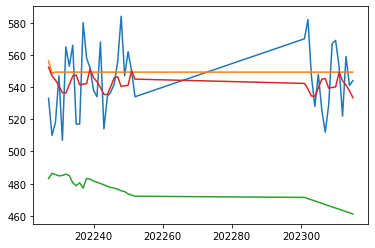

In [46]:
# Visualize the forecasts
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_predictions, label='ARIMA')
plt.plot(test.index, sarima_predictions, label='SARIMA')
plt.plot(test.index, holt_winters_predictions, label='Holt-Winters')

### FORECASTING

In [22]:
# Split data into training and testing sets
train = ts_data.iloc[:172]

In [23]:
# Holt-Winters model
def holt_winters_forecast(train):
    model = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(13)
    return forecast

In [24]:
# Perform forecasting using Holt-Winters
holt_winters_predictions = holt_winters_forecast(train)

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
holt_winters_predictions

171    536.670263
172    541.996683
173    544.960514
174    542.755039
175    540.432724
176    545.958336
177    544.627906
178    548.197600
179    538.339414
180    543.191432
181    544.464315
182    533.013429
183    535.863625
dtype: float64